<a href="https://colab.research.google.com/github/anurag0308/sentiment_analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/docker/

/content/drive/My Drive/docker


In [ ]:
!pwd

/content/drive/My Drive/docker


In [ ]:
!nvidia-smi

Sun Jan 17 08:20:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip3 install future

In [ ]:
#from __fututre__ import absolute_import, division, print_function, unicode_literals
try:
  !pip uninstall tb-nightly tensorboardX tensorboard
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf

import os
import datetime
import tensorflow_datasets as tfds

%load_ext tensorboard

Uninstalling tb-nightly-2.5.0a20210116:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/tb_nightly-2.5.0a20210116.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
Proceed (y/n)? u
Your response ('u') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled tb-nightly-2.5.0a20210116
  Using cached https://files.pythonhosted.org/packages/16/79/8aafd4e4a6a60c7ce76346c3e32ce99c4b4f0e9974c8656848bafe902e7a/tb_nightly-2.5.0a20210116-py3-none-any.whl


In [ ]:
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)

tensorboard-plugin-wit 1.7.0
tb-nightly 2.5.0a20210116


In [ ]:
print(tf.__version__)

2.5.0-dev20210114


In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
dataset,info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00',with_info = True)

Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteCAH35H/amazon_us_reviews-train.tfrecord


Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [ ]:
train_dataset = dataset['train']

In [ ]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [ ]:
print(train_dataset) #datacolumn with datatype

<PrefetchDataset shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [ ]:
len(list(train_dataset))

104975

In [ ]:
BUFFER_SIZE = 30000
BATCH_SIZE = 128

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE,reshuffle_each_iteration=False)

In [ ]:
for reviews in train_dataset.take(2):
  print(reviews)


{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'52321161'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=3>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B000GHIUJA'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'914514278'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Creative Labs Zen Nano Plus 1GB MP3/WMA Player ( Orange )'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'[Note: you do not have to pay a premium price to get colors like orange.  As I write the price is about twice the retail.  Get it instead from the Creative site (all colors) or a Cambridge Soundworks store (many colors) and pay no more than retail price.]<br /><br />I would have given Creative Zen Nano Plus (abbreviated \\\\"CZNP\\\\") 5 stars, except for two small deficience

In [ ]:
for reviews in train_dataset.take(10): #takes 10 datapoints
  review_text = reviews['data'] #take data key only
  print(review_text.get('review_body').numpy()) #
  print(review_text.get('star_rating'))
  print(tf.where(review_text.get('star_rating')>3,1,0).numpy()) #reviews above 3 are given 1 and below 3 are given 0

b'[Note: you do not have to pay a premium price to get colors like orange.  As I write the price is about twice the retail.  Get it instead from the Creative site (all colors) or a Cambridge Soundworks store (many colors) and pay no more than retail price.]<br /><br />I would have given Creative Zen Nano Plus (abbreviated \\\\"CZNP\\\\") 5 stars, except for two small deficiences: it does not have gapless playback (see #10 below), and the build quality and controls are kind of cheap (see #4 below).  Assuming it lasts, it seems a very good unit for the money.  Here\'s why I bought mine, and some questions to ask yourself when you\'re choosing.  [Updated 8/28/2006]<br /><br />0. Do I want to make a fashion statement with my MP3 player?<br /><br />Some people will only buy a trendy iPod.  Buying a lesser-known unit like CZNP makes a different statement, and you can choose from 10 colors.  I prefer function over form, but CZNP offers some of each.  I bought an orange one because it is easy 

**Preprocessing**


1.   tokenize and build a vocabulary
2.   List 



In [ ]:
#preprocessing
import tensorflow_datasets as tfds
tokenizer = tfds.deprecated.text.Tokenizer()

vocabulary_set = set()
for _, reviews in train_dataset.enumerate():
  review_text = reviews['data']
  reviews_tokens = tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(reviews_tokens)

vocab_size = len(vocabulary_set)
vocab_size


73738

In [ ]:
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set)

In [ ]:
print(vocabulary_set)

{'dismissing', 'Key', 'picutre', 'confines', 'cryptically', 'BEING', 'B0013PQ6P4', 'RAM', 'Shortcake', 'Furthermore', 'troubleshooting', 'B0002FHENE', 'foreigner', 'produck', 'recently', 'Ariicanna', 'clusmy', 'Badging', 'cliam', '5CPS', 'Anything', 'disperse', 'B002BE6F5W', 'Returned', 'mA', 'Soundbridge', 'Tn', 'Hopes', '630am', 'iMerchandise', 'beaumont', 'unclipping', 'bebay', 'N900', 'Booster', 'B005CSBDDS', 'tred', 'SUPCASE', 'Center', 'Plaid', 'middlemen', 'Cyanogen', 'Ooontz', 'countdown', 'tether', 'instructor', 'Recomend', 'porgrammed', 'powerhungry', 'outdoorsmn', 'largish', 'subsidizing', '10534624_10152553457671407_133767171625394836_n', 'GPX0000', 'CONAIR', 'BCT8', 'logged', 'stabilisation', 'Several', 'carolina', 'Lcd', 'Legend', 'buttoned', 'natal', 'abnoxious', 'Products', 'PARONOID', 'Camsdigital', 'occupation', 'Breaks', 'mason', 'getaways', 'Gomadics', 'L5', 'hummingbirds', 'soundcards', 'Pulls', 'asi', 'Staying', '10CVT652', 'encrusted', 'disarray', 'DEVASTATED', '

In [ ]:
for reviews in train_dataset.take(5):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example = encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)

b'[Note: you do not have to pay a premium price to get colors like orange.  As I write the price is about twice the retail.  Get it instead from the Creative site (all colors) or a Cambridge Soundworks store (many colors) and pay no more than retail price.]<br /><br />I would have given Creative Zen Nano Plus (abbreviated \\\\"CZNP\\\\") 5 stars, except for two small deficiences: it does not have gapless playback (see #10 below), and the build quality and controls are kind of cheap (see #4 below).  Assuming it lasts, it seems a very good unit for the money.  Here\'s why I bought mine, and some questions to ask yourself when you\'re choosing.  [Updated 8/28/2006]<br /><br />0. Do I want to make a fashion statement with my MP3 player?<br /><br />Some people will only buy a trendy iPod.  Buying a lesser-known unit like CZNP makes a different statement, and you can choose from 10 colors.  I prefer function over form, but CZNP offers some of each.  I bought an orange one because it is easy 

In [ ]:
for index in encoded_example:
  print('{} ------> {}'.format(index,encoder.decode([index])))

58813 ------> The
7156 ------> case
16015 ------> is
15749 ------> a
35673 ------> cheap
64815 ------> plastic
41223 ------> that
32676 ------> barely
66720 ------> lines
21021 ------> up
4815 ------> with
51908 ------> its
65869 ------> other
31468 ------> half
27502 ------> making
26613 ------> it
29921 ------> nearly
64050 ------> impossible
15123 ------> to
25322 ------> close
70363 ------> securely
56444 ------> It
60164 ------> s
21683 ------> also
15749 ------> a
3004 ------> little
38869 ------> loose
58813 ------> The
31590 ------> opening
5035 ------> in
48832 ------> the
7156 ------> case
15123 ------> to
28732 ------> plug
5035 ------> in
48832 ------> the
32956 ------> USB
57015 ------> cord
20051 ------> doesn
15274 ------> t
65519 ------> even
33496 ------> line
21021 ------> up
4815 ------> with
48832 ------> the
40640 ------> iTouch
50887 ------> so
11390 ------> you
22804 ------> have
15123 ------> to
19784 ------> remove
48832 ------> the
7156 ------> case
5035 -----

In [ ]:
 def encode(text_tensor,label_tensor):
   encoded_text = encoder.encode(text_tensor.numpy())
   label = tf.where(label_tensor>3,1,0)
   return encoded_text,label

In [ ]:
def encode_map_fn(tensor):

  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating')

  encoded_text, label = tf.py_function(encode,
                                       inp=[text,label],
                                       Tout = (tf.int64,tf.int32))
  
  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [ ]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [ ]:
for encodings,sentiment in ar_encoded_data.take(2):
  print(encodings,sentiment)

tf.Tensor([10849 11390 46023 ... 16015 63750 73269], shape=(2645,), dtype=int64) tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[ 8124  9510 11059 68166  5035 15749 11712  9510 69566 11059 39723 49174
 25054 56592 27036 66721 26613 12750 26099 32823 55402  6393 45024 12427
 67661 35593 11206 37686 48832 45896  7462 26613 43293 29522 63914 48832
 11712 16015  1967 21021 37005 50887 56592 13241 15274 41721 67661 48832
 41331 16015 17503 56592 67948 11384 54733 54739 38499 49730 57327 39711
 67661 25200 15274 13369 33740 35661 28608], shape=(67,), dtype=int64) tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
TEST_TAKE_SIZE = 10000

train_data = ar_encoded_data.skip(TEST_TAKE_SIZE).shuffle(BUFFER_SIZE) #skips first 10000 records
train_data = train_data.padded_batch(BATCH_SIZE) #standardize text length with batch size

test_data = ar_encoded_data.take(TEST_TAKE_SIZE) #first 10000 records
test_data = test_data.padde d_batch(BATCH_SIZE) 

In [ ]:
vocab_size += 1

In [ ]:
sample_text, sample_labels = next(iter(test_data))

sample_text[0],sample_labels[0]


(<tf.Tensor: shape=(2645,), dtype=int64, numpy=array([10849, 11390, 46023, ..., 16015, 63750, 73269])>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>)

In [ ]:
for f0,f1 in test_data.take(1):
  print(f0,f1)

tf.Tensor(
[[10849 11390 46023 ... 16015 63750 73269]
 [ 8124  9510 11059 ...     0     0     0]
 [29076 25657 56165 ...     0     0     0]
 ...
 [56592 40318 10158 ...     0     0     0]
 [12750 36469 31608 ...     0     0     0]
 [19836 10158  7156 ...     0     0     0]], shape=(128, 2645), dtype=int64) tf.Tensor(
[1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1], shape=(128,), dtype=int32)


In [ ]:
for f0,f1 in test_data.take(10):
  print(tf.unique_with_counts(f1)[2].numpy())

[81 47]
[90 38]
[87 41]
[88 40]
[94 34]
[48 80]
[82 46]
[87 41]
[41 87]
[84 44]


**LSTM**


1.   
2.   



In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
for units in [64,64]:
  model.add(tf.keras.layers.Dense(units,activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

In [ ]:
!rm -r /tmp/logs/

rm: cannot remove '/tmp/logs/': No such file or directory


In [ ]:
logdir = os.path.join("/tmp/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/tmp/sentiment_analysis.hdf5',verbose=1,save_best=True)

model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,epochs=4,validation_data=test_data,callbacks=[tensorboard_callback,checkpointer])

Epoch 1/4
742/742 [==============================] - 6357s 9s/step - loss: 0.4216 - accuracy: 0.7824 - val_loss: 0.2949 - val_accuracy: 0.8640

Epoch 00001: saving model to /tmp/sentiment_analysis.hdf5
Epoch 2/4
742/742 [==============================] - 6354s 9s/step - loss: 0.2483 - accuracy: 0.8967 - val_loss: 0.2984 - val_accuracy: 0.8857

Epoch 00002: saving model to /tmp/sentiment_analysis.hdf5
Epoch 3/4
742/742 [==============================] - 6251s 8s/step - loss: 0.2062 - accuracy: 0.9174 - val_loss: 0.2894 - val_accuracy: 0.8817

Epoch 00003: saving model to /tmp/sentiment_analysis.hdf5
Epoch 4/4
742/742 [==============================] - 6182s 8s/step - loss: 0.1781 - accuracy: 0.9282 - val_loss: 0.3039 - val_accuracy: 0.8833

Epoch 00004: saving model to /tmp/sentiment_analysis.hdf5


In [ ]:
model.save('/tmp/final_sentiment_analysis.hdf5')

In [ ]:
!ls -alrt /tmp/*.hdf5

-rw-r--r-- 1 root root 118634552 Jan 17 17:46 /tmp/sentiment_analysis.hdf5
-rw-r--r-- 1 root root 118634552 Jan 17 18:01 /tmp/final_sentiment_analysis.hdf5


In [ ]:
eval_loss,eval_acc = model.evaluate(test_data) #evaluating model with test data

79/79 [==============================] - 218s 3s/step - loss: 0.3039 - accuracy: 0.8833


In [ ]:
for f0,f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))

tf.Tensor(
[1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1], shape=(128,), dtype=int32)
[[-3.3486876e+00]
 [ 3.0703833e+00]
 [ 4.5286913e+00]
 [ 5.1401157e+00]
 [-5.9471178e+00]
 [-1.6966139e+00]
 [ 1.5215482e+00]
 [ 4.9363666e+00]
 [ 1.4504216e+00]
 [ 4.9127536e+00]
 [-7.2109776e+00]
 [ 4.8388400e+00]
 [ 1.1827624e+00]
 [-1.5405549e+00]
 [-6.6572638e+00]
 [ 3.2853136e+00]
 [ 4.6541386e+00]
 [ 3.7323630e+00]
 [ 1.7455331e+00]
 [ 4.8731952e+00]
 [ 4.4842873e+00]
 [ 3.6331465e+00]
 [-6.2453794e+00]
 [ 3.2316227e+00]
 [-1.8817281e+00]
 [ 4.5769663e+00]
 [ 3.1164563e+00]
 [-3.8667250e-01]
 [ 5.3790369e+00]
 [ 2.2082915e+00]
 [ 4.9211988e+00]
 [ 3.8031969e+00]
 [-7.1541896e+00]
 [-5.3696909e+00]
 [-3.6923628e+00]
 [-2.0090086e+00]
 [ 4.3391557e+00]
 [ 4.7451429e+00]
 [ 7.1258992e-01

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         9438592   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,878,593
Trainable params: 9,878,593
Non-trainable params: 0
______________________________________________

In [ ]:
model.get_layer('embedding').output

<KerasTensor: shape=(None, None, 128) dtype=float32 (created by layer 'embedding')>

In [ ]:
!nvidia-smi

Sun Jan 17 18:09:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history,metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric,'val_'+metric])
  plt.show()

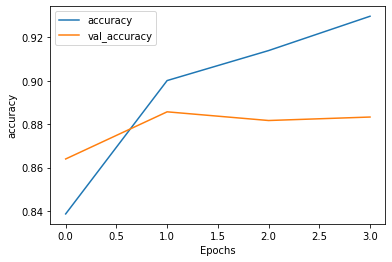

In [ ]:
plot_graphs(history,'accuracy')

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
sa_load = tf.keras.models.load_model('/tmp/sentiment_analysis.hdf5',compile = False)

In [ ]:
def pad_to_size(vec,size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
def predict_fn(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoder_pred_text,32)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text,tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text,0))

  return (predictions)
